# this is the actual production function
`create world`
I'm a big fan of rouge-like games and RPGs. I'm also a big fan of data science tools for Python. This is my attempt to have it all. 

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

import lib.create_world as c
import lib.drawMaps as draw

`timeit` functions to examin the runtime of each component. 

In [2]:
%%timeit
geo_world = c.the_first_age({})

2.25 s ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
geo_world = c.the_first_age({})

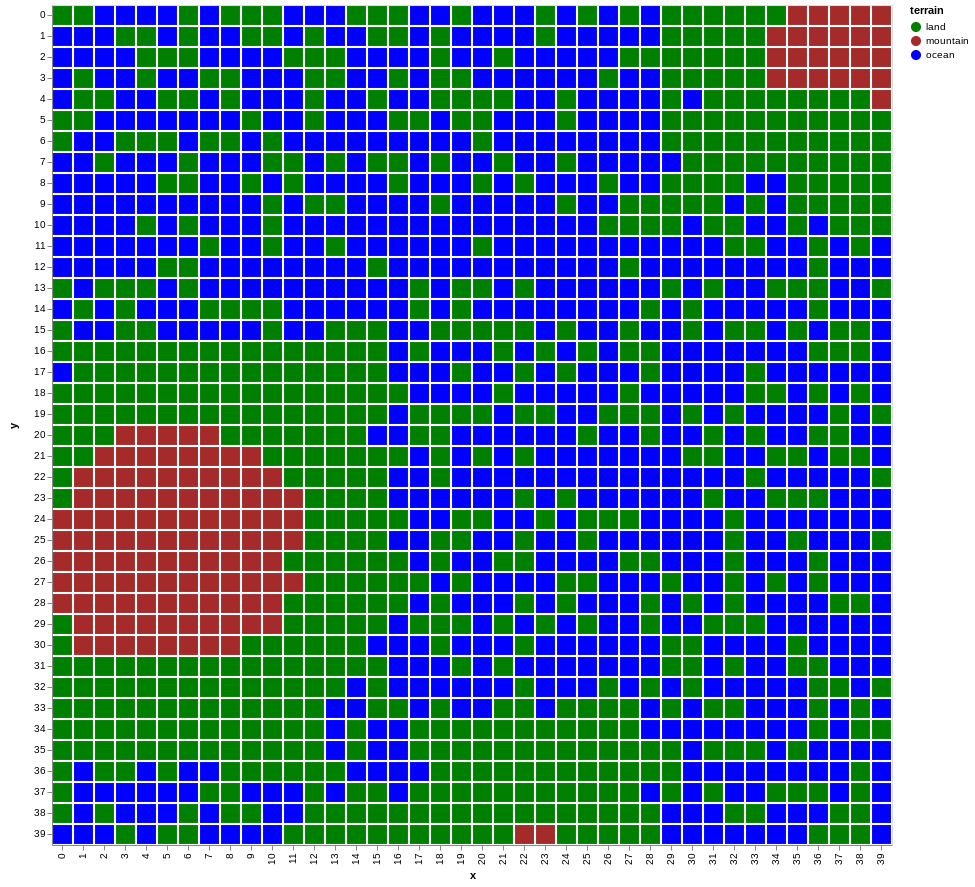

In [5]:
draw.drawTerrainTypes(geo_world.grid_elevation,geo_world.landscape)

In [6]:
%%timeit
wa = [geo_world.df_features.loc[m].to_dict() for m in geo_world.df_features.index]
dim_1 = np.unique(geo_world.df_features['x']) 
dim_1 = np.unique(geo_world.df_features['y']) 

388 ms ± 2.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
wa = [geo_world.df_features.loc[m].to_dict() for m in geo_world.df_features.index]
dim_1 = np.unique(geo_world.df_features['x']) 
dim_1 = np.unique(geo_world.df_features['y']) 

In [8]:
m = geo_world.df_features.index[1]
geo_world.df_features.loc[m].to_dict()

{'y': 0,
 'rainfall': 0.0,
 'x': 1,
 'key': '1:0',
 'elevation': 1.0,
 'terrain': 'desert'}

In [9]:
geo_world.culture